# <font color='red' style='font-size: 30px;'>Data Insider</font>


<hr style='border: 2px solid red;'>

1. Configurando el ambiente

In [1]:
#importando las bibliotecas
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


2. Obtencion de los datos

Accede a las siguientes URLs para descargar los datasets que estaremos utilizando:
Forbes Global 2000 2008-2022 (mil $ unit) - dataset by aroissues

Fortune Global 500

Continentes y países

In [2]:
!pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.4 MB/s eta 0:00:00


# Obteniendo la informacion de Polygon.io

In [ ]:
pip install polygon-api-client

In [ ]:
#obtencion de datos de la API polygon.io


from datetime import datetime
from polygon import RESTClient
import pandas as pd
import time
api_key = '5PZ49NWrMqjs94ljpEeqPjJiHncFTBbu'

Client = RESTClient(api_key)
#General Motors Company: GM
#Ford Motor Company: F
#Tesla, Inc.: TSLA
#Toyota Motor Corporation: TM
#Honda Motor Co., Ltd.: HMC
tickers = ['GM','F','TSLA','TM','HMC']
stocks=[]

for t in tickers:
  bars = Client.get_aggs(ticker = t, multiplier = 1, timespan= "day", from_="2022-01-01", to="2022-12-31")
  for bar in bars:
      stock={}
      stock['Ticker'] = t
      stock['Fecha']= datetime.fromtimestamp(bar.timestamp/1000).strftime("%Y-%m-%d")
      stock['Apertura']=bar.open
      stock['Cierre']=bar.close
      stock['Maximo']=bar.high
      stock['Minimo']=bar.low
      stocks.append(stock)
  time.sleep(12)

df= pd.DataFrame(stocks)
df.to_csv('dataApi.csv', index=False)




In [4]:
df=pd.read_csv('dataApi.csv')
df.head()

,Ticker,Fecha,Apertura,Cierre,Maximo,Minimo
0,GM,2022-01-03,59.870,61.17,61.57,59.740
1,GM,2022-01-04,61.955,65.74,65.98,61.955
2,GM,2022-01-05,65.520,62.74,67.21,62.600
3,GM,2022-01-06,63.165,62.87,63.50,61.670
4,GM,2022-01-07,63.810,62.27,63.91,61.420


In [5]:
df.Ticker.unique()

array(['GM', 'F', 'TSLA', 'TM', 'HMC'], dtype=object)

In [6]:
data_GM = df.query("Ticker == 'GM'")
data_GM.to_csv('data_GM.csv', index=False)

In [7]:
data_F = df.query("Ticker == 'F'")
data_F.to_csv('data_F.csv', index=False)

In [8]:
data_TSLA = df.query("Ticker == 'TSLA'")
data_TSLA.to_csv('data_TSLA.csv', index=False)

In [9]:
data_TM = df.query("Ticker == 'TM'")
data_TM.to_csv('data_TM.csv', index=False)

In [10]:
data_HMC = df.query("Ticker == 'HMC'")
data_HMC.to_csv('data_HMC.csv', index=False)

Obteniendo la informacion de Forbes Global

In [11]:
forbes_2008=pd.read_excel('/content/Forbes Global 2000 - 2008 — unified industry.xlsx')
forbes_2009=pd.read_excel('/content/Forbes Global 2000 - 2009 — unified industry.xlsx')
forbes_2010=pd.read_excel('/content/Forbes Global 2000 - 2010 — unified industry.xlsx')
forbes_2011=pd.read_excel('/content/Forbes Global 2000 - 2011 — unified industry.xlsx')
forbes_2012=pd.read_excel('/content/Forbes Global 2000 - 2012 — unified industry.xlsx')
forbes_2013=pd.read_excel('/content/Forbes Global 2000 - 2013 — unified industry.xlsx')
forbes_2014=pd.read_excel('/content/Forbes Global 2000 - 2014 — unified industry.xlsx')
forbes_2015=pd.read_excel('/content/Forbes Global 2000 - 2015 — unified industry.xlsx')
forbes_2016=pd.read_excel('/content/Forbes Global 2000 - 2016 — unified industry.xlsx')
forbes_2017=pd.read_excel('/content/Forbes Global 2000 - 2017 — unified industry.xlsx')
forbes_2018=pd.read_excel('/content/Forbes Global 2000 - 2018 — unified industry.xlsx')
forbes_2019=pd.read_excel('/content/Forbes Global 2000 - 2019 — unified industry.xlsx')
forbes_2020=pd.read_excel('/content/Forbes Global 2000 - 2020 — unified industry.xlsx')
forbes_2021=pd.read_excel('/content/Forbes Global 2000 - 2021 — unified industry.xlsx')
forbes_2022=pd.read_excel('/content/Forbes Global 2000 - 2022 — unified industry.xlsx')

Obteniendo la informacion de Fortune_Global

In [12]:
fortune_2015 = pd.read_html('/content/fortune_global_2015.html')[0]
fortune_2016 = pd.read_html('/content/fortune_global_2016.html')[0]
fortune_2017 = pd.read_html('/content/fortune_global_2017.html')[0]
fortune_2018 = pd.read_html('/content/fortune_global_2018.html')[0]
fortune_2019 = pd.read_html('/content/fortune_global_2019.html')[0]
fortune_2020 = pd.read_html('/content/fortune_global_2020.html')[0]
fortune_2021 = pd.read_html('/content/fortune_global_2021.html')[0]
fortune_2022 = pd.read_html('/content/fortune_global_2022.html')[0]

Obteniendo la informacion de codigo de pais y continente

In [13]:
continente = pd.read_csv('continente.csv')
continente

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa
...,...,...,...,...
253,South America,SA,VEN,"Venezuela, Bolivarian Republic of"
254,Oceania,OC,WLF,Wallis and Futuna
255,Oceania,OC,WSM,"Samoa, Independent State of"
256,Asia,AS,YEM,Yemen


In [14]:
codigo_pais = pd.read_csv('country_code.csv')
codigo_pais

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


3. Data Wrangling (limpieza manipulacion de la informacion)

1. En esta fase vas a explorar mejor cada uno de tus datasets de Forbes Global 2000, cambiar los nombres de las columnas (Empresa, Industria, Pais, Ingresos, Ganancias, Activos y Valor de Mercado), y crear las siguientes variables (para los datasets de Forbes 2000):

    -Margen de Rentabilidad: Ganancias/Ingresos

    -Rentabilidad de los Activos (ROA): Ganancias/Activos

    -Año: Según el nombre de cada dataset

Eliminación de valores nulos

In [15]:
forbes_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       2000 non-null   int64  
 1   Company       2000 non-null   object 
 2   Industry      2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         2000 non-null   float64
 5   Profits       1998 non-null   float64
 6   Assets        2000 non-null   float64
 7   Market_Value  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


In [16]:
forbes_2008= forbes_2008.dropna()
forbes_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       1998 non-null   int64  
 1   Company       1998 non-null   object 
 2   Industry      1998 non-null   object 
 3   Country       1998 non-null   object 
 4   Sales         1998 non-null   float64
 5   Profits       1998 non-null   float64
 6   Assets        1998 non-null   float64
 7   Market_Value  1998 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.5+ KB


In [17]:
#pense automatizarlo de la siguiente forma pero no funciono, no se porque

#data = [forbes_2008, forbes_2009, forbes_2010, forbes_2011, forbes_2012,
#        forbes_2013, forbes_2014, forbes_2015, forbes_2016, forbes_2017,
#        forbes_2018, forbes_2019, forbes_2020, forbes_2021, forbes_2022]
#for d in data:
#    d= d.dropna()
forbes_2008= forbes_2008.dropna()
forbes_2009= forbes_2009.dropna()
forbes_2010= forbes_2010.dropna()
forbes_2011= forbes_2011.dropna()
forbes_2012= forbes_2012.dropna()
forbes_2013= forbes_2013.dropna()
forbes_2014= forbes_2014.dropna()
forbes_2015= forbes_2015.dropna()
forbes_2016= forbes_2016.dropna()
forbes_2017= forbes_2017.dropna()
forbes_2018= forbes_2018.dropna()
forbes_2019= forbes_2019.dropna()
forbes_2020= forbes_2020.dropna()
forbes_2021= forbes_2021.dropna()
forbes_2022= forbes_2022.dropna()

In [18]:
forbes_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank_nr       2000 non-null   object 
 1   Company       2000 non-null   object 
 2   Industry      2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         2000 non-null   int64  
 5   Profits       2000 non-null   float64
 6   Assets        2000 non-null   int64  
 7   Market_Value  2000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


Adicionado campos Margen_rentabilidad, Renta_activos, Año

In [19]:
data= [forbes_2008, forbes_2009, forbes_2010,forbes_2011,
       forbes_2012, forbes_2013, forbes_2014,forbes_2015,
       forbes_2016,forbes_2017, forbes_2018, forbes_2019,
       forbes_2020,forbes_2021, forbes_2022
       ]
nombres = ['Ranking', 'Empresa', 'Industria','Pais','Ingresos','Ganancias',
           'Activos','Valor_mercado']

#Cambiar los nombres de algunas columnas específicas
i = 2008
for d  in data:
    d.columns=nombres
    d['Margen_renta']= d.Ganancias/d.Ingresos
    d['Renta_activos']= d.Ganancias/d.Activos
    d['Año']=i
    i+=1



In [20]:
forbes_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ranking        2000 non-null   object 
 1   Empresa        2000 non-null   object 
 2   Industria      2000 non-null   object 
 3   Pais           2000 non-null   object 
 4   Ingresos       2000 non-null   int64  
 5   Ganancias      2000 non-null   float64
 6   Activos        2000 non-null   int64  
 7   Valor_mercado  2000 non-null   int64  
 8   Margen_renta   2000 non-null   float64
 9   Renta_activos  2000 non-null   float64
 10  Año            2000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


Verificando que nuevamente no existan valores nulos

In [21]:

#data= [forbes_2008, forbes_2009, forbes_2010,forbes_2011,
#       forbes_2012, forbes_2013, forbes_2014,forbes_2015,
#       forbes_2016,forbes_2017, forbes_2018, forbes_2019,
#       forbes_2020,forbes_2021, forbes_2022
#       ]

#Cambiar los nombres de algunas columnas específicas
#for d  in data:
#    d = d.dropna()
forbes_2008= forbes_2008.dropna()
forbes_2009= forbes_2009.dropna()
forbes_2010= forbes_2010.dropna()
forbes_2011= forbes_2011.dropna()
forbes_2012= forbes_2012.dropna()
forbes_2013= forbes_2013.dropna()
forbes_2014= forbes_2014.dropna()
forbes_2015= forbes_2015.dropna()
forbes_2016= forbes_2016.dropna()
forbes_2017= forbes_2017.dropna()
forbes_2018= forbes_2018.dropna()
forbes_2019= forbes_2019.dropna()
forbes_2020= forbes_2020.dropna()
forbes_2021= forbes_2021.dropna()
forbes_2022= forbes_2022.dropna()

In [22]:
forbes_2022.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor_mercado,Margen_renta,Renta_activos,Año
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476,0.325233,0.093655,2022
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425,0.259593,0.009790,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,0.263160,0.182909,2022
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446,0.338159,0.010649,2022
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325,0.232036,0.009877,2022


Fortune Global 500: cambiar únicamente el nombre de las dos columnas que vas a utilizar (Empresa, Empleados) y añadir una nueva columna para el Año. De esta manera, vas a obtener datasets de Fortune con 3 columnas y 500 filas cada uno.

In [23]:
fortune_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   RemoveRank                    500 non-null    int64 
 1   RemoveName                    500 non-null    object
 2   RemoveRevenues                500 non-null    int64 
 3   RemoveRevenue Percent Change  500 non-null    object
 4   RemoveProfits                 500 non-null    object
 5   RemoveAssets                  500 non-null    int64 
 6   RemoveEmployees               500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [24]:
"""
data= [fortune_2016, fortune_2017,
       fortune_2018, fortune_2019, fortune_2020,
       fortune_2021, fortune_2022
       ]
"""
columnas  = ['RemoveName', 'RemoveEmployees']
nombres_nuevos = {'RemoveName': 'Empresa',
                  'RemoveEmployees': 'Empleados'}
fortune_2015 = fortune_2015[columnas]
fortune_2015 = fortune_2015.rename(columns=nombres_nuevos)
fortune_2015['Año'] = 2015

fortune_2016 = fortune_2016[columnas]
fortune_2016 = fortune_2016.rename(columns=nombres_nuevos)
fortune_2016['Año'] = 2016

fortune_2017 = fortune_2017[columnas]
fortune_2017 = fortune_2017.rename(columns=nombres_nuevos)
fortune_2017['Año'] = 2017

fortune_2018 = fortune_2018[columnas]
fortune_2018 = fortune_2018.rename(columns=nombres_nuevos)
fortune_2018['Año'] = 2018

fortune_2019 = fortune_2019[columnas]
fortune_2019 = fortune_2019.rename(columns=nombres_nuevos)
fortune_2019['Año'] = 2019

fortune_2020 = fortune_2020[columnas]
fortune_2020 = fortune_2020.rename(columns=nombres_nuevos)
fortune_2020['Año'] = 2020

fortune_2021 = fortune_2021[columnas]
fortune_2021 = fortune_2021.rename(columns=nombres_nuevos)
fortune_2021['Año'] = 2021

fortune_2022 = fortune_2022[columnas]
fortune_2022 = fortune_2022.rename(columns=nombres_nuevos)
fortune_2022['Año'] = 2022


"""
anio = 2016
for d in data:
   d =d[columnas]
   d= d.rename(columns=nombres_nuevos)
   d ['Año']= anio
   anio =+ 1
"""


"\nanio = 2016\nfor d in data:\n   d =d[columnas]\n   d= d.rename(columns=nombres_nuevos)\n   d ['Año']= anio\n   anio =+ 1\n"

In [25]:
fortune_2022.head()

,Empresa,Empleados,Año
0,Walmart,2300000,2022
1,Amazon,1608000,2022
2,State Grid,871145,2022
3,China National Petroleum,1090345,2022
4,Sinopec Group,542286,2022


Continente y country_code
A los datasets de country_code y de continente les vas a renombrar sus nombres de columna únicamente. Vas a mantener en ambos datasets las columnas del nombre de pais y codigo (3 letras) y en el de continente, vas a mantener el nombre del continente.

In [26]:
df_continente= pd.read_csv('continente.csv')
#df_continente= df_continente.dropna()

In [27]:
df_continente.head()

,Continent_Name,Continent_Code,Three_Letter_Country_Code,Country_Name
0,Asia,AS,AFG,"Afghanistan, Islamic Republic of"
1,Europe,EU,ALB,"Albania, Republic of"
2,Antarctica,AN,ATA,Antarctica (the territory South of 60 deg S)
3,Africa,AF,DZA,"Algeria, People's Democratic Republic of"
4,Oceania,OC,ASM,American Samoa


In [28]:
df_continente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Continent_Name             258 non-null    object
 1   Continent_Code             215 non-null    object
 2   Three_Letter_Country_Code  258 non-null    object
 3   Country_Name               258 non-null    object
dtypes: object(4)
memory usage: 8.2+ KB


In [29]:
nombres = ['Nombre_continente', 'Codigo_continente', 'Codigo_pais','nombre_pais' ]
df_continente.columns = nombres


In [30]:
df_pais= pd.read_csv('country_code.csv')

nombres = ['Pais', 'Codigo_pais']
df_pais.columns=nombres
df_pais['Pais'].replace('Korea, South', 'South Korea', inplace= True)



In [31]:
#df_pais_continente= pd.merge(df_pais,df_continente, on='Codigo')
#df_pais_continente.head()
# Realizar el join y mostrar el resultado

pais_continente = pd.merge(df_pais, df_continente, on='Codigo_pais', how='left', indicator=True)
pais_continente.drop_duplicates(inplace=True)
print(pais_continente)

# Obtener las filas que no se encontraron en el resultado
no_encontradas = pais_continente[pais_continente['_merge'] == 'left_only']
print("Filas no encontradas:")
print(len(no_encontradas))


               Pais Codigo_pais Nombre_continente Codigo_continente  \
0       Afghanistan         AFG              Asia                AS   
1           Albania         ALB            Europe                EU   
2           Algeria         DZA            Africa                AF   
3    American Samoa         ASM           Oceania                OC   
4           Andorra         AND            Europe                EU   
..              ...         ...               ...               ...   
224  Virgin Islands         VGB     North America               NaN   
225       West Bank         WBG               NaN               NaN   
226           Yemen         YEM              Asia                AS   
227          Zambia         ZMB            Africa                AF   
228        Zimbabwe         ZWE            Africa                AF   

                                  nombre_pais     _merge  
0            Afghanistan, Islamic Republic of       both  
1                        Alba

A United States, le asigno NaN en el codigo del continente por lo que lo corrigo

In [33]:

# Criterio de búsqueda
criterio = pais_continente['Codigo_pais'] == 'USA'

# Filtrar el DataFrame según el criterio y reemplazar los valores
pais_continente.loc[criterio, 'Codigo_continente'] = 'NA'
pais_continente[200:228]

criterio= pais_continente ['Nombre_continente']=='North America'
pais_continente.loc[criterio,'Codigo_continente']='NA'
pais_continente[200:228]

,Pais,Codigo_pais,Nombre_continente,Codigo_continente,nombre_pais,_merge
200,Syria,SYR,Asia,AS,Syrian Arab Republic,both
201,Taiwan,TWN,Asia,AS,Taiwan,both
202,Tajikistan,TJK,Asia,AS,"Tajikistan, Republic of",both
203,Tanzania,TZA,Africa,AF,"Tanzania, United Republic of",both
204,Thailand,THA,Asia,AS,"Thailand, Kingdom of",both
205,Timor-Leste,TLS,Asia,AS,"Timor-Leste, Democratic Republic of",both
206,Togo,TGO,Africa,AF,"Togo, Togolese Republic",both
207,Tonga,TON,Oceania,OC,"Tonga, Kingdom of",both
208,Trinidad and Tobago,TTO,North America,NA,"Trinidad and Tobago, Republic of",both
209,Tunisia,TUN,Africa,AF,"Tunisia, Tunisian Republic",both


4. Junción de tablas y análisis exploratorio

1. Es esencial aclarar que el dataframe principal, del cual vamos a partir para desarrollar el análisis es el de Forbes 2000 - 2022.

2. Al dataframe indicado, le vamos a añadir los dataframes de continente y de  country_code, seleccionando únicamente las columnas de Continente, Pais y Codigo. Asegúrate de escoger la junción que mantiene todo el primer dataset completo.

In [34]:
forbes_2022.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor_mercado,Margen_renta,Renta_activos,Año
0,1,Berkshire Hathaway,Diversified Financials,United States,276094,89795.0,958784,741476,0.325233,0.093655,2022
1,2,ICBC,Banking,China,208127,54028.3,5518508,214425,0.259593,0.009790,2022
2,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376,105363.0,576041,2292077,0.263160,0.182909,2022
3,4,JPMorgan Chase,Diversified Financials,United States,124542,42115.0,3954687,374446,0.338159,0.010649,2022
4,5,China Construction Bank,Banking,China,202069,46887.3,4746951,181325,0.232036,0.009877,2022


Reviso si siguem existiendo null

In [35]:
num_nan = pais_continente.loc[pais_continente['Codigo_continente'].isna(),:]
print('Cantidad de elemenetos nan:', num_nan)
pais_continente.info()



Cantidad de elemenetos nan:              Pais Codigo_pais Nombre_continente Codigo_continente nombre_pais  \
16   Bahamas, The         BHM               NaN               NaN         NaN   
114        Kosovo         KSV               NaN               NaN         NaN   
225     West Bank         WBG               NaN               NaN         NaN   

        _merge  
16   left_only  
114  left_only  
225  left_only  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Pais               229 non-null    object  
 1   Codigo_pais        229 non-null    object  
 2   Nombre_continente  226 non-null    object  
 3   Codigo_continente  226 non-null    object  
 4   nombre_pais        226 non-null    object  
 5   _merge             229 non-null    category
dtypes: category(1), object(5)
memory usage: 11.1+ KB


Elimino duplicados

In [36]:
pais_continente.dropna(inplace = True )
pais_continente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 228
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Pais               226 non-null    object  
 1   Codigo_pais        226 non-null    object  
 2   Nombre_continente  226 non-null    object  
 3   Codigo_continente  226 non-null    object  
 4   nombre_pais        226 non-null    object  
 5   _merge             226 non-null    category
dtypes: category(1), object(5)
memory usage: 10.9+ KB


In [ ]:
forbes_final = forbes_2022.merge(pais_continente[['Pais', 'Codigo_pais', 'Codigo_continente']], left_on='Pais', right_on='Pais', how='left')
forbes_final.sample(20)

In [38]:
forbes_final.dropna(inplace = True )
forbes_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033 entries, 0 to 2033
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            2033 non-null   object 
 1   Empresa            2033 non-null   object 
 2   Industria          2033 non-null   object 
 3   Pais               2033 non-null   object 
 4   Ingresos           2033 non-null   int64  
 5   Ganancias          2033 non-null   float64
 6   Activos            2033 non-null   int64  
 7   Valor_mercado      2033 non-null   int64  
 8   Margen_renta       2033 non-null   float64
 9   Renta_activos      2033 non-null   float64
 10  Año                2033 non-null   int64  
 11  Codigo_pais        2033 non-null   object 
 12  Codigo_continente  2033 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 222.4+ KB


In [39]:

# Encontrar los registros con valores NaN
registros_nan = forbes_final[forbes_final.isna().any(axis=1)]

# Mostrar los registros con valores NaN
print(registros_nan)


Empty DataFrame
Columns: [Ranking, Empresa, Industria, Pais, Ingresos, Ganancias, Activos, Valor_mercado, Margen_renta, Renta_activos, Año, Codigo_pais, Codigo_continente]
Index: []


5. Consulta de datos

Cuestionario A
Las siguientes preguntas se refieren al ranking Forbes 2000 del año 2022:

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

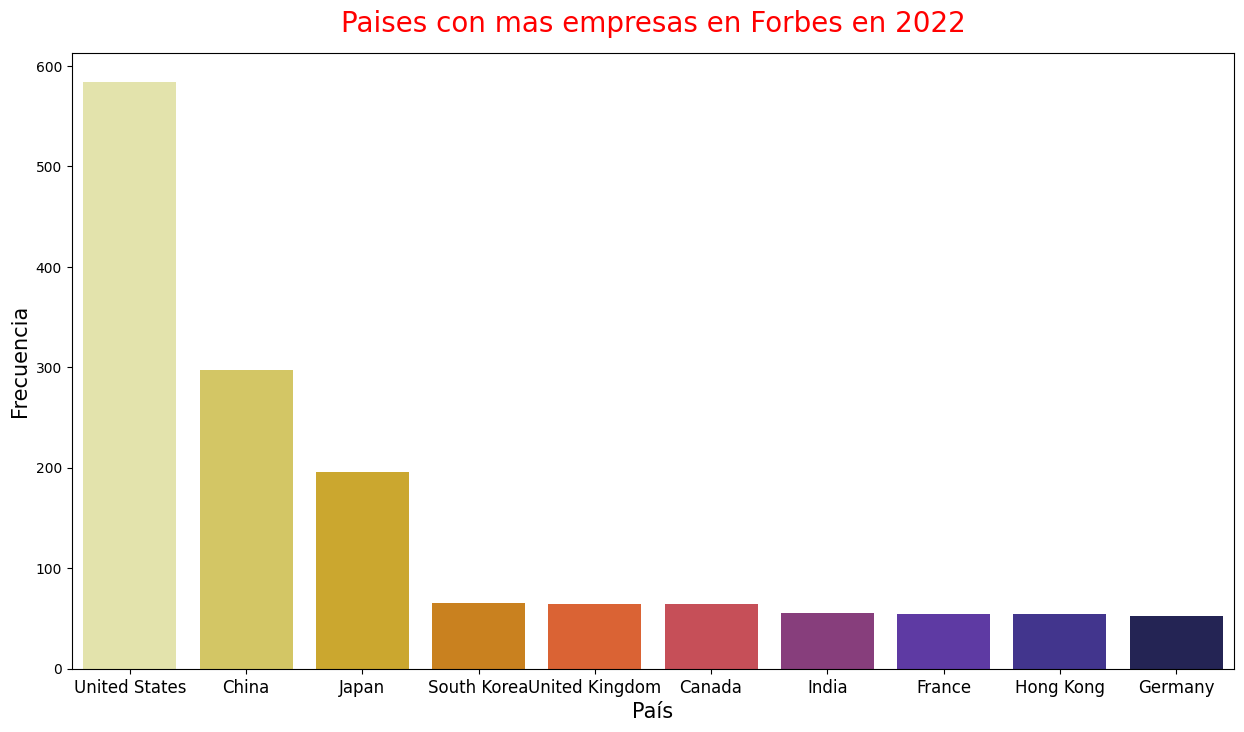

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = forbes_final['Pais'].value_counts().head(10)

plt.figure(figsize=(15, 8))
plt.title('Paises con mas empresas en Forbes en 2022', fontsize = 20, color= 'Red', pad= 15)
plt.xlabel('País', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

sns.barplot(x=top10.index, y=top10.values, palette='CMRmap_r')

plt.xticks(fontsize=12)
plt.show()

2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?

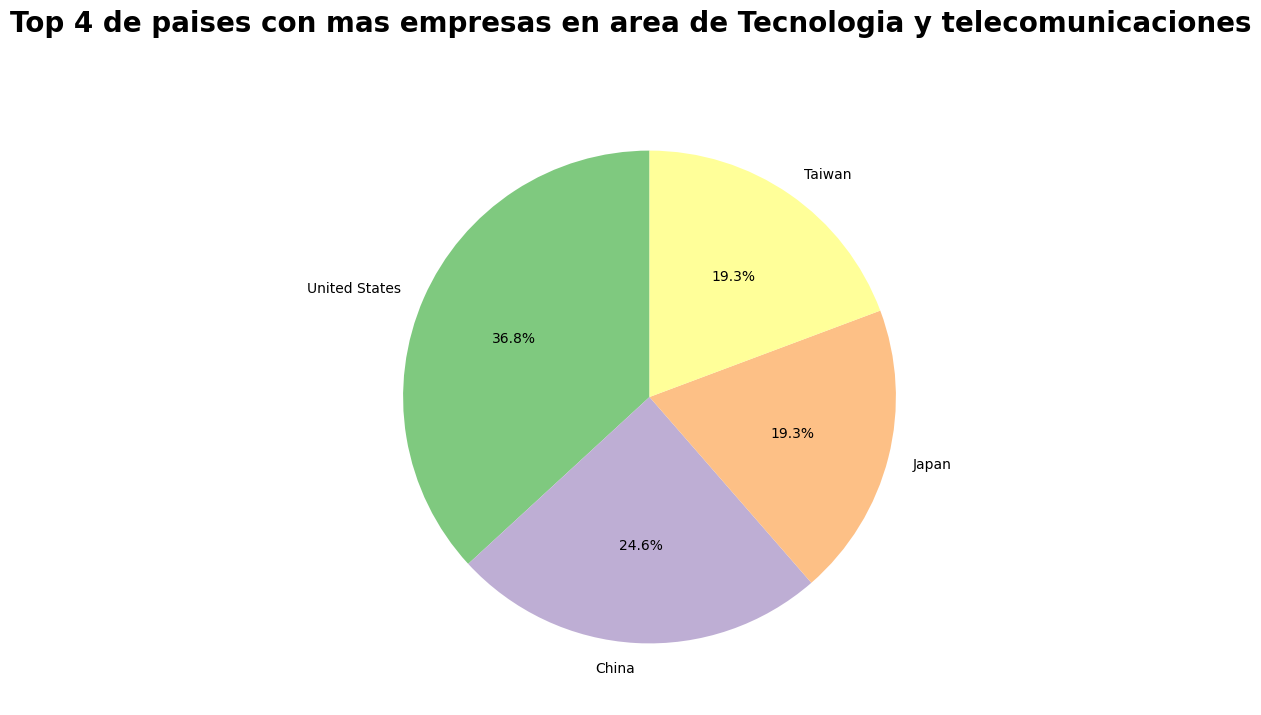

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

criterio  = forbes_final['Industria'].isin(['Technology Hardware & Equipment', 'Telecommunications Services'])
top4 = forbes_final.loc[criterio, 'Pais'].value_counts().head(4)


plt.figure(figsize=(15, 8))
plt.pie( top4.values, labels=top4.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('Accent'))
plt.suptitle('Top 4 de paises con mas empresas en area de Tecnologia y telecomunicaciones',fontsize=20,weight='bold')
plt.show()


3.¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

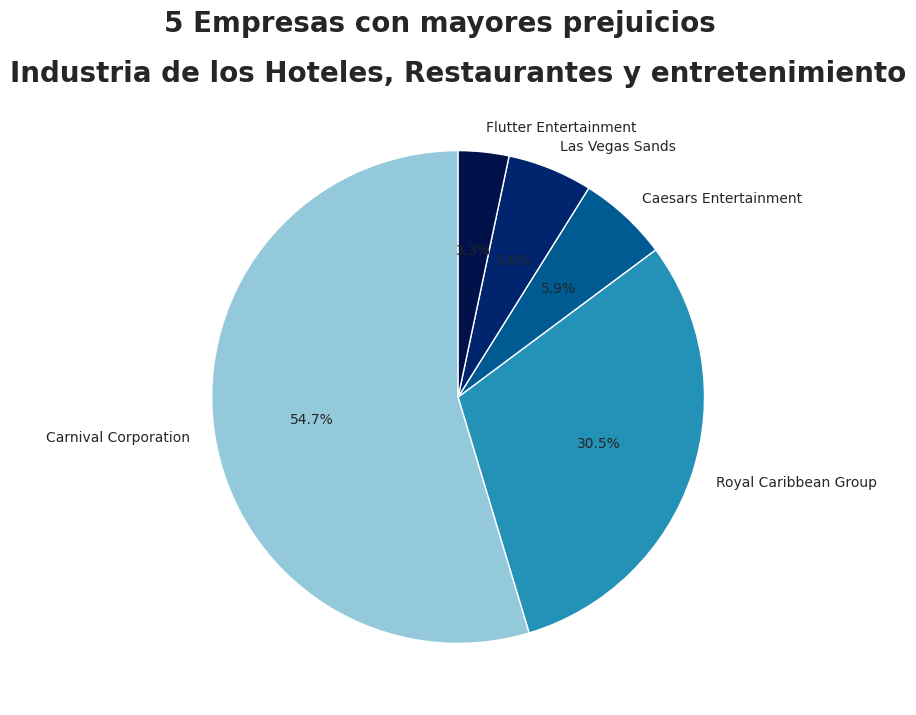

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

criterio  = forbes_final.query("Industria=='Hotels, Restaurants & Leisure' and Ganancias < 0 ").sort_values('Ganancias')
criterio = criterio.head(5)

plt.figure(figsize=(15, 8))
plt.pie( abs(criterio['Ganancias']), labels=criterio['Empresa'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('ocean_r'))
plt.suptitle('5 Empresas con mayores prejuicios',fontsize=20,weight='bold')
plt.title('Industria de los Hoteles, Restaurantes y entretenimiento',fontsize=20,weight='bold')
plt.show()

4.Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?

In [50]:
forbes_final['Codigo_continente'].unique()

array(['NA', 'AS', 'EU', 'SA', 'OC', 'AF'], dtype=object)

In [51]:
criterio=forbes_final.query("Industria=='Oil & Gas Operations' and Codigo_continente=='AS'  and Margen_renta > 0.20")
len(criterio)


7

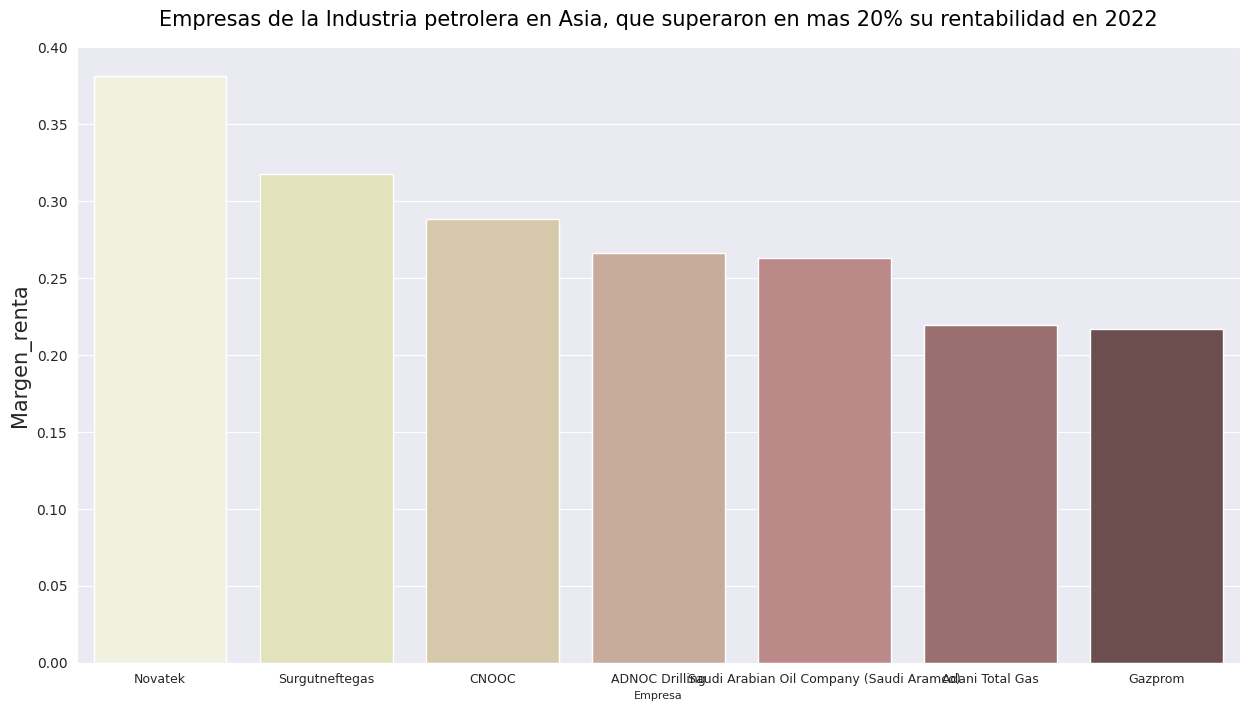

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
criterio=forbes_final.query("Industria=='Oil & Gas Operations' and Codigo_continente=='AS'  and Margen_renta > 0.20").sort_values(by='Margen_renta', ascending=False)

plt.figure(figsize=(15, 8))
plt.title('Empresas de la Industria petrolera en Asia, que superaron en mas 20% su rentabilidad en 2022', fontsize = 15, color= 'Black', pad= 15)
plt.xlabel('País', fontsize=8)
plt.ylabel('Rentabilidad', fontsize=15)

sns.barplot(x=criterio['Empresa'], y=criterio['Margen_renta'], palette='pink_r')

plt.xticks(fontsize=9)
plt.show()

5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?

In [53]:
df_norteamerica= forbes_final[forbes_final['Codigo_continente'].isin(['NA'])]
df_Norte_Industria = df_norteamerica.groupby('Industria')['Margen_renta'].max()
df_Norte_Industria = df_Norte_Industria.sort_values(ascending=False)

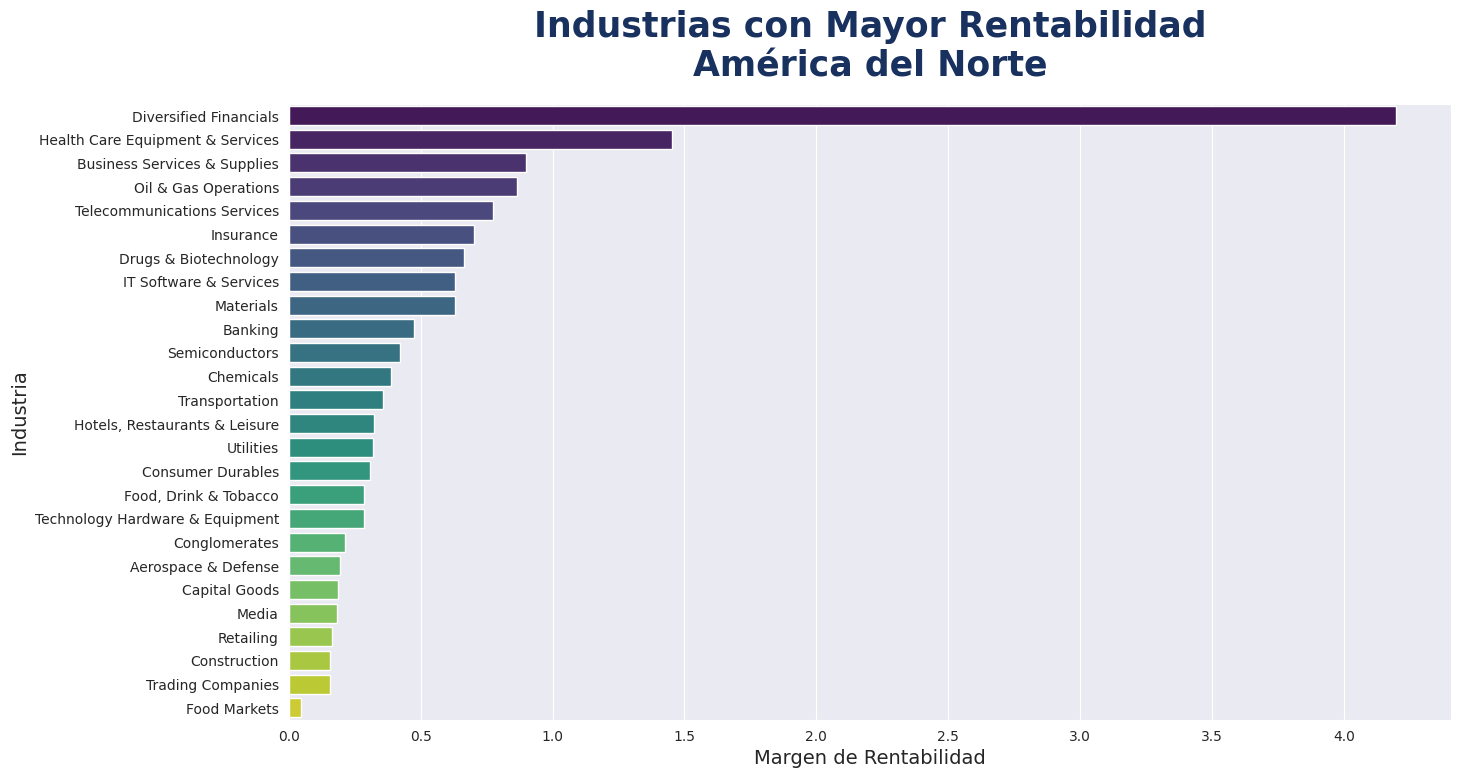

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(15, 8))

# Crear la gráfica de barras horizontales
sns.barplot(x=df_Norte_Industria.values, y=df_Norte_Industria.index, palette='viridis', ax=ax)

# Configuración de los títulos y etiquetas
ax.set_title('Industrias con Mayor Rentabilidad\nAmérica del Norte', fontsize=25, color='#19315F', pad=20, fontweight='bold')
ax.set_xlabel('Margen de Rentabilidad', fontsize=14)
ax.set_ylabel('Industria', fontsize=14)

plt.show()



6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con mayores pérdidas registradas por industria a nivel global?

<ipython-input-55-a333726511e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europa_perdidas['Perdidas']=abs(df_europa_perdidas['Ganancias'])


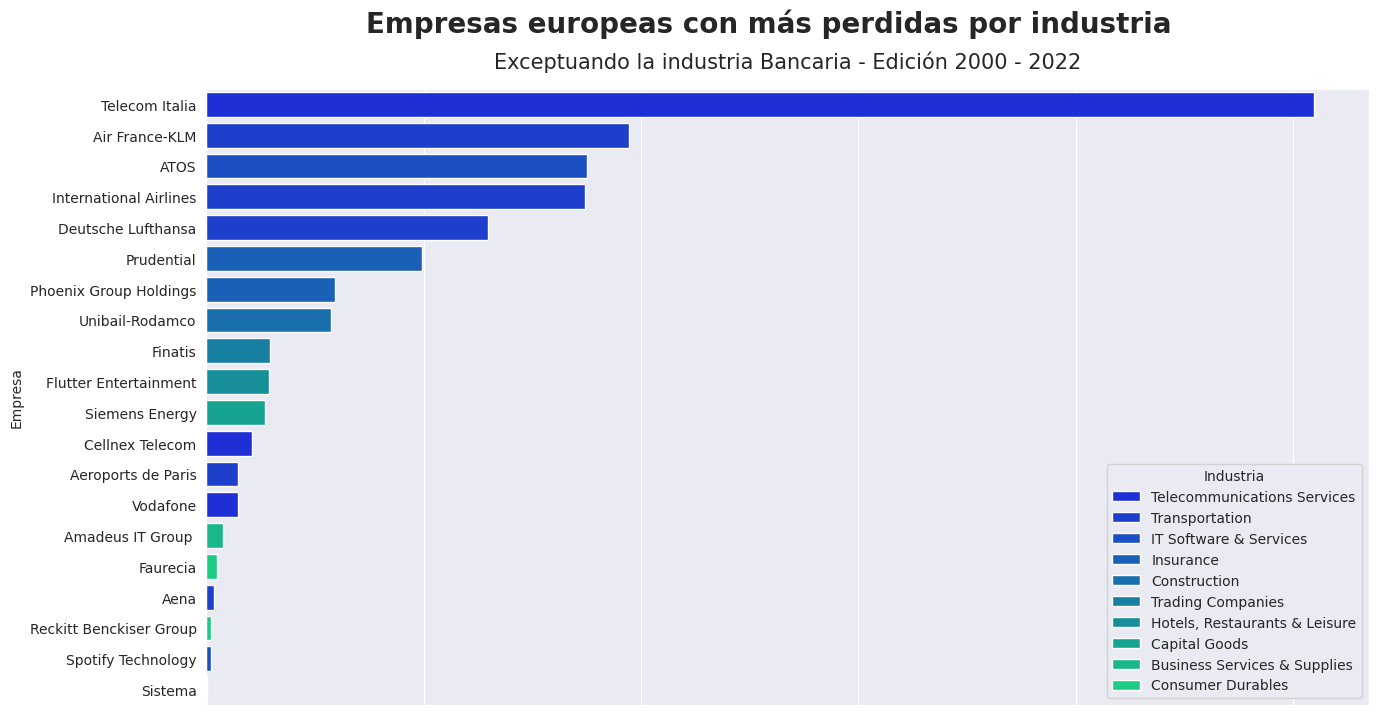

In [55]:
import matplotlib.pyplot as plt

df_europa_perdidas = forbes_final.query(" Industria != 'Banking' and Codigo_continente == 'EU' and Ganancias < 0 ")

df_europa_perdidas['Perdidas']=abs(df_europa_perdidas['Ganancias'])
df_europa_perdidas = df_europa_perdidas[['Empresa', 'Industria', 'Perdidas']].sort_values('Perdidas', ascending=False)
df_europa_perdidas.head()
len(df_europa_perdidas)

#Realizar la grafica correspondiente
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df_europa_perdidas, x='Perdidas', y='Empresa', hue='Industria', dodge=False,palette='winter')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas europeas con más perdidas por industria',fontsize=20,weight='bold')
plt.title('Exceptuando la industria Bancaria - Edición 2000 - 2022',fontsize=15,pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

plt.show()



7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?


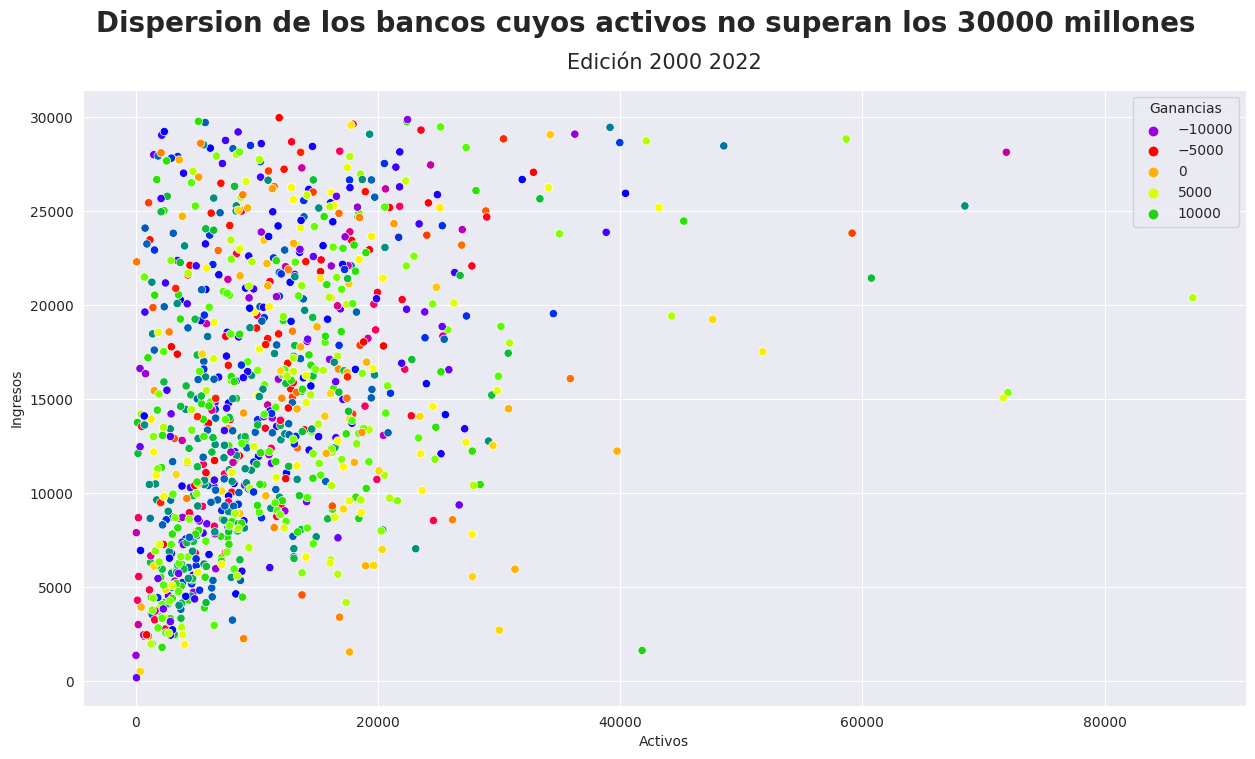

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Filtrar los datos
#data_filtrada = data_2022_cont[data_2022_cont['Activos'] <= 30000]
bancos_criterio =forbes_final.query(" Activos < 30000")
sns.scatterplot(data=bancos_criterio, x='Ingresos', y='Activos', hue='Ganancias',palette='prism')

# Personalizar el gráfico
plt.suptitle('Dispersion de los bancos cuyos activos no superan los 30000 millones',fontsize=20,weight='bold')
plt.title('Edición 2000 2022',fontsize=15,pad=15)
plt.xlabel('Activos')
plt.ylabel('Ingresos')

plt.show()




8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)



<ipython-input-57-08e30e892a46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GM['datetime'] = pd.to_datetime(data_GM['Fecha'])
<ipython-input-57-08e30e892a46>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semana = data_GM.groupby(data_GM['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
<ipython-input-57-08e30e892a46>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semana.index, rotation=45, ha='right')


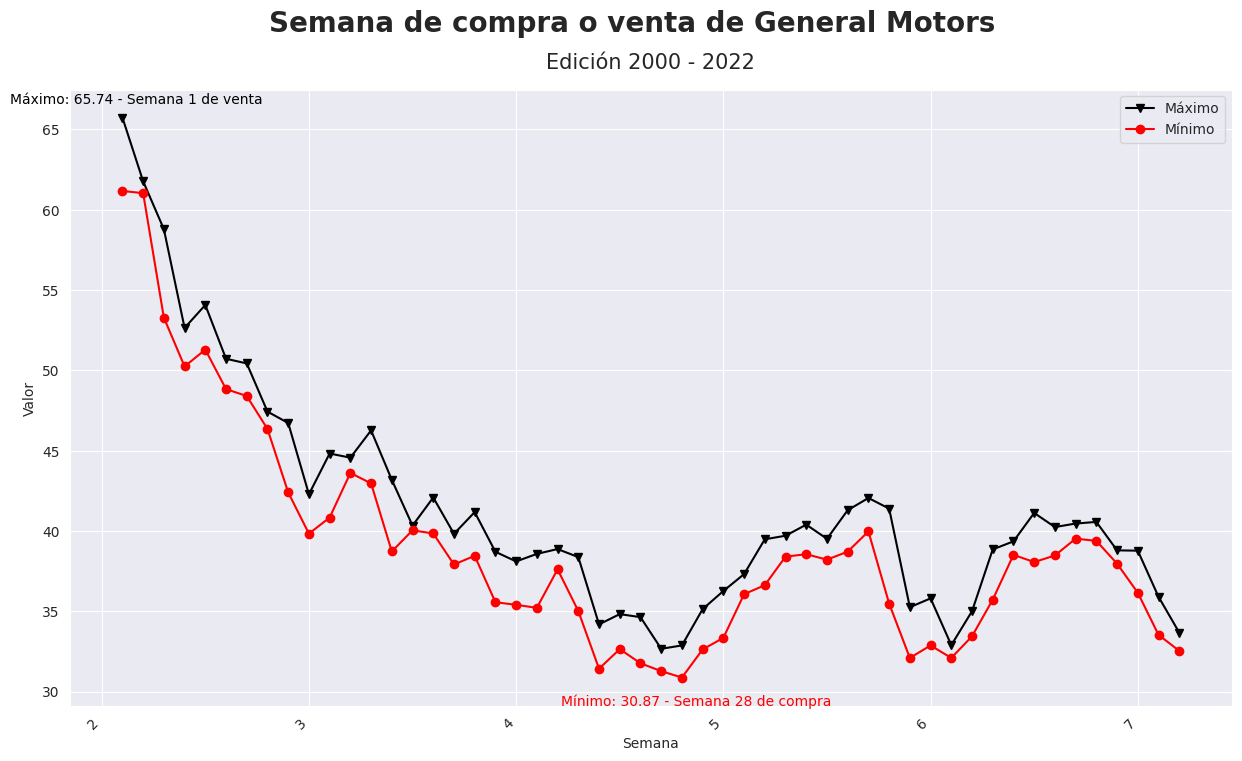

In [57]:
#Se agrupan los datos por semana
data_GM['datetime'] = pd.to_datetime(data_GM['Fecha'])
data_semana = data_GM.groupby(data_GM['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
semana_compra = data_semana['min'].idxmin()
semana_venta = data_semana['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semana.index, data_semana['max'], marker='v', label='Máximo',color='black')
ax.plot(data_semana.index, data_semana['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de General Motors', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semana.index, rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semana['max'].idxmax()
indice_minimo = data_semana['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semana.loc[indice_maximo, 'max']
valor_minimo = data_semana.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='black', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-58-f6a49a929b41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_F['datetime'] = pd.to_datetime(data_F['Fecha'])
<ipython-input-58-f6a49a929b41>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semana = data_F.groupby(data_F['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
<ipython-input-58-f6a49a929b41>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semana.index, rotation=45, ha='right')


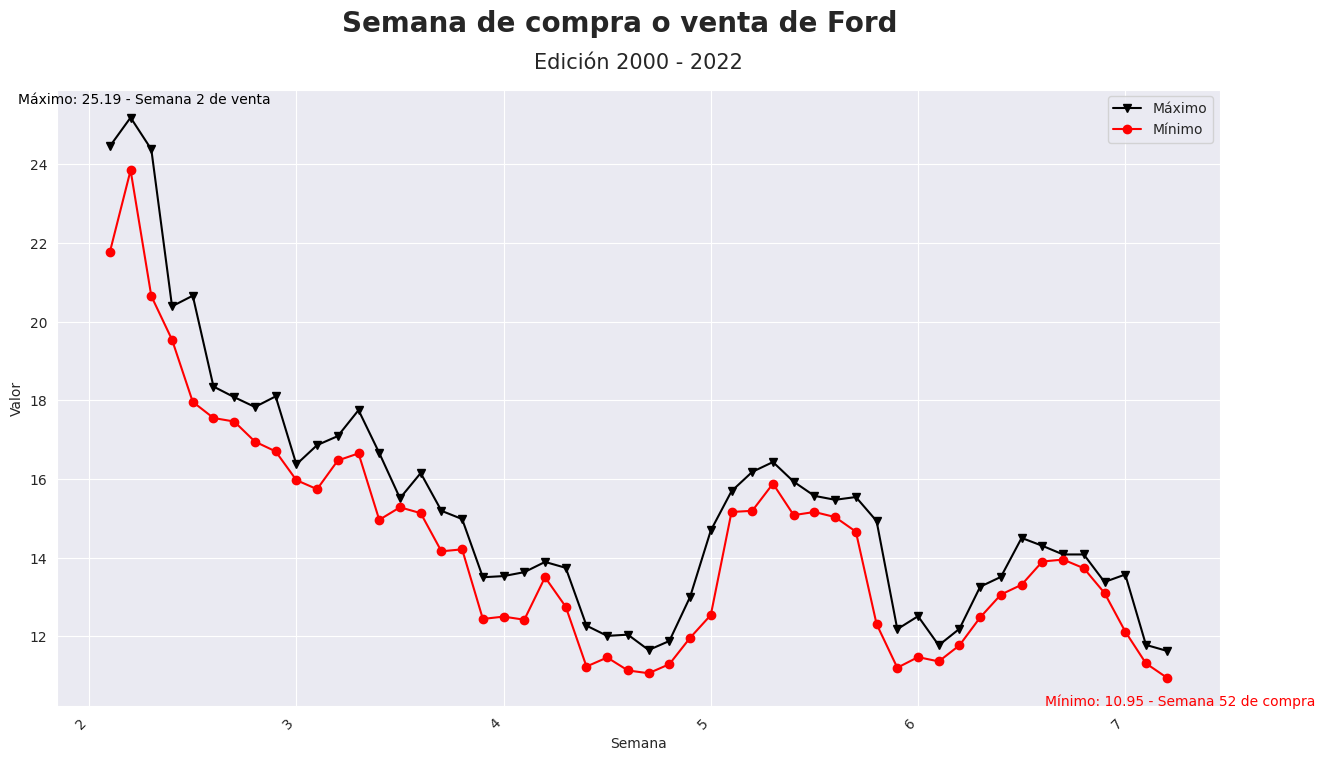

In [58]:
#Se agrupan los datos por semana
data_F['datetime'] = pd.to_datetime(data_F['Fecha'])
data_semana = data_F.groupby(data_F['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
semana_compra = data_semana['min'].idxmin()
semana_venta = data_semana['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semana.index, data_semana['max'], marker='v', label='Máximo',color='black')
ax.plot(data_semana.index, data_semana['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Ford', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semana.index, rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semana['max'].idxmax()
indice_minimo = data_semana['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semana.loc[indice_maximo, 'max']
valor_minimo = data_semana.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='black', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-59-1165a4436f1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TSLA ['datetime'] = pd.to_datetime(data_TSLA ['Fecha'])
<ipython-input-59-1165a4436f1f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semana = data_TSLA.groupby(data_TSLA['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
<ipython-input-59-1165a4436f1f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semana.index, rotation=45, ha='right')


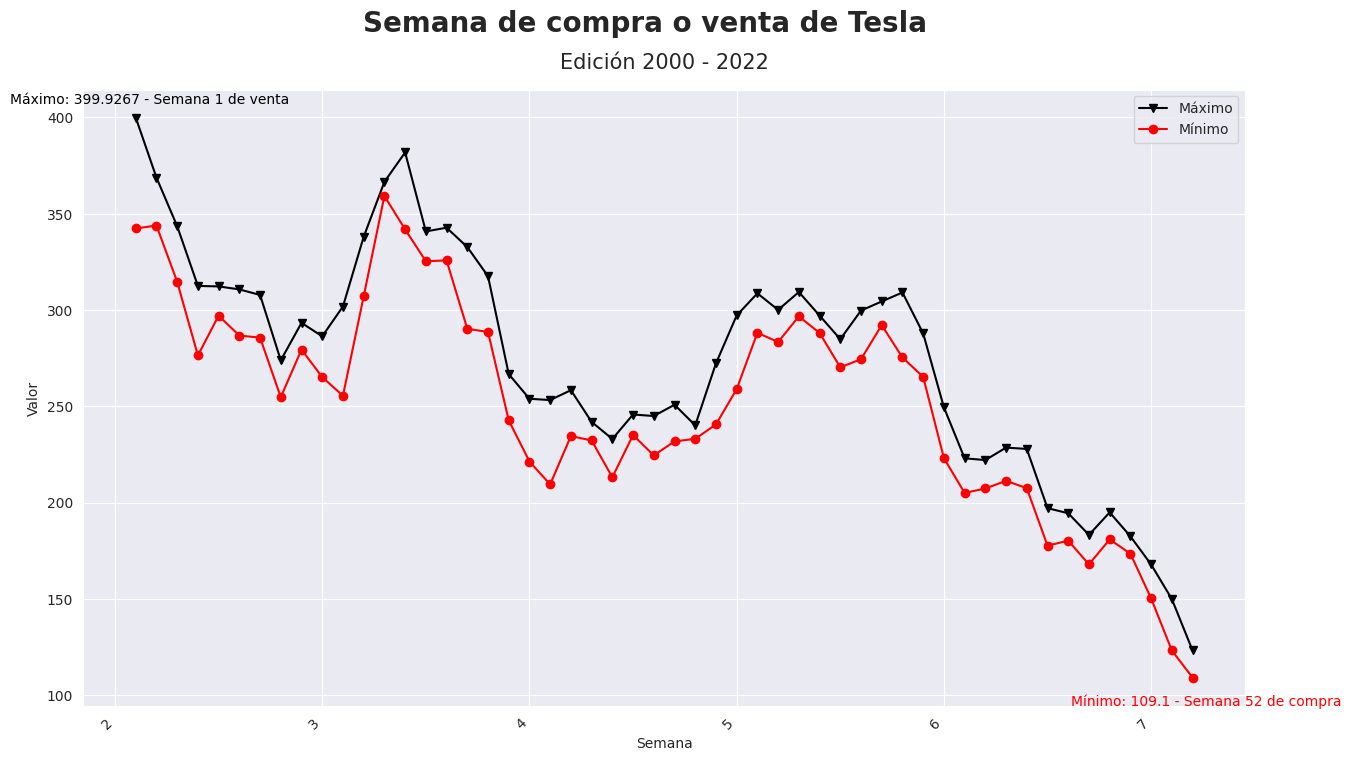

In [59]:
#Se agrupan los datos por semana
data_TSLA ['datetime'] = pd.to_datetime(data_TSLA ['Fecha'])
data_semana = data_TSLA.groupby(data_TSLA['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
semana_compra = data_semana['min'].idxmin()
semana_venta = data_semana['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semana.index, data_semana['max'], marker='v', label='Máximo',color='black')
ax.plot(data_semana.index, data_semana['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Tesla', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semana.index, rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semana['max'].idxmax()
indice_minimo = data_semana['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semana.loc[indice_maximo, 'max']
valor_minimo = data_semana.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='black', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-60-067d480556a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TM ['datetime'] = pd.to_datetime(data_TM ['Fecha'])
<ipython-input-60-067d480556a5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semana = data_TM.groupby(data_TM['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
<ipython-input-60-067d480556a5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semana.index, rotation=45, ha='right')


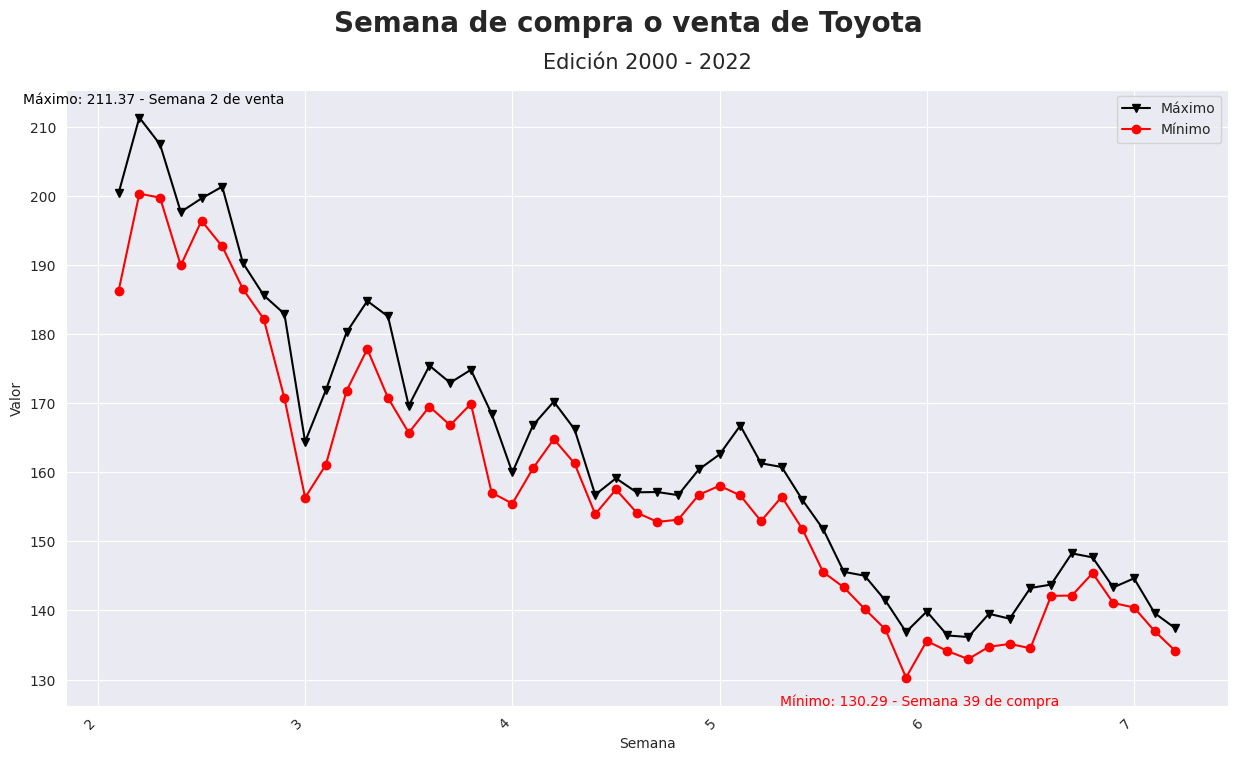

In [60]:
#Se agrupan los datos por semana
data_TM ['datetime'] = pd.to_datetime(data_TM ['Fecha'])
data_semana = data_TM.groupby(data_TM['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
semana_compra = data_semana['min'].idxmin()
semana_venta = data_semana['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semana.index, data_semana['max'], marker='v', label='Máximo',color='black')
ax.plot(data_semana.index, data_semana['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Toyota', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semana.index, rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semana['max'].idxmax()
indice_minimo = data_semana['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semana.loc[indice_maximo, 'max']
valor_minimo = data_semana.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='black', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

<ipython-input-61-da0320238378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HMC ['datetime'] = pd.to_datetime(data_HMC ['Fecha'])
<ipython-input-61-da0320238378>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_semana = data_HMC.groupby(data_HMC['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
<ipython-input-61-da0320238378>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_semana.index, rotation=45, ha='right')


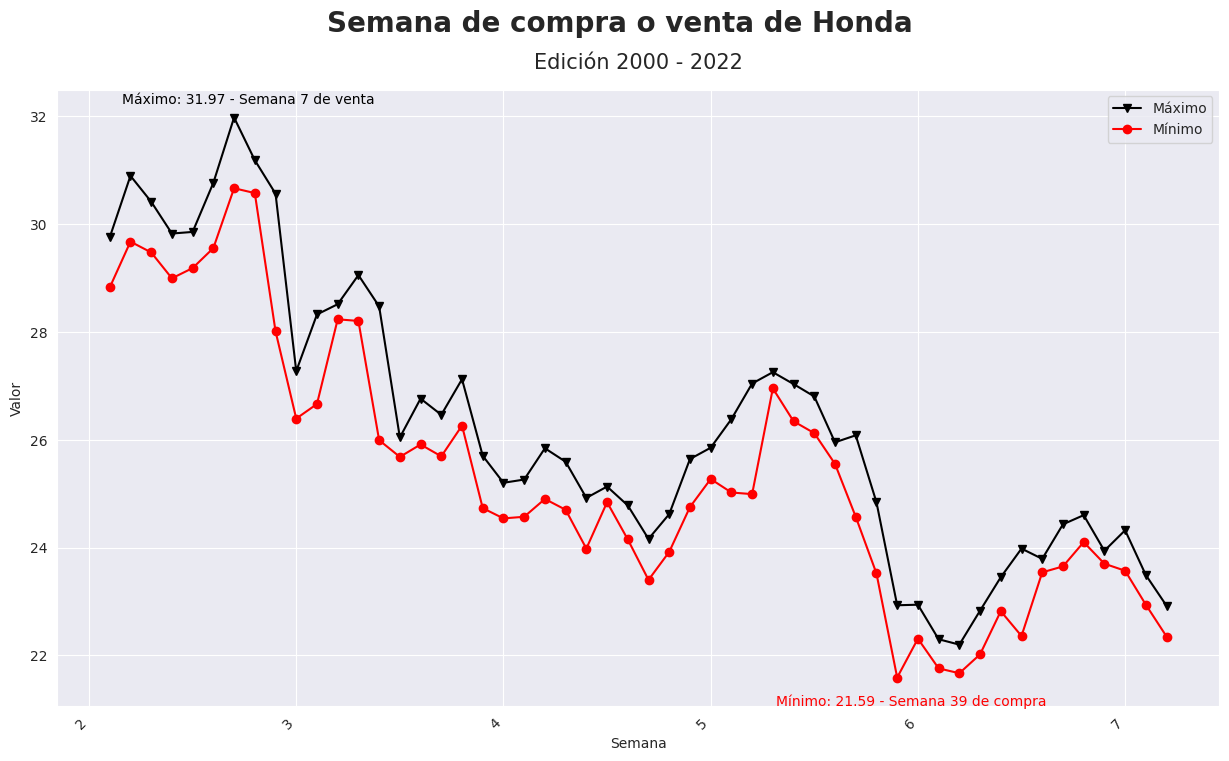

In [61]:
#Se agrupan los datos por semana
data_HMC ['datetime'] = pd.to_datetime(data_HMC ['Fecha'])
data_semana = data_HMC.groupby(data_HMC['datetime'].dt.week)['Cierre'].agg(['min', 'max'])
semana_compra = data_semana['min'].idxmin()
semana_venta = data_semana['max'].idxmax()

fig, ax = plt.subplots(figsize=(15, 8))

# Graficar las líneas de los valores máximos y mínimos
ax.plot(data_semana.index, data_semana['max'], marker='v', label='Máximo',color='black')
ax.plot(data_semana.index, data_semana['min'], marker='o', label='Mínimo', color='red')

# Configurar los ejes y el título
ax.set_xlabel('Semana')
ax.set_ylabel('Valor')
plt.suptitle('Semana de compra o venta de Honda', fontsize=20, fontweight='bold')
ax.set_title('Edición 2000 - 2022',fontsize=15,pad=15)

# Ajustar las etiquetas del eje x
ax.set_xticklabels(data_semana.index, rotation=45, ha='right')

# Obtener los índices de los valores máximos y mínimos
indice_maximo = data_semana['max'].idxmax()
indice_minimo = data_semana['min'].idxmin()

# Obtener los valores máximos y mínimos
valor_maximo = data_semana.loc[indice_maximo, 'max']
valor_minimo = data_semana.loc[indice_minimo, 'min']
# Agregar una leyenda
ax.legend()
ax.annotate(f'Máximo: {valor_maximo} - Semana {semana_venta} de venta', (indice_maximo, valor_maximo), xytext=(10, 10),
            textcoords='offset points', color='black', ha='center')
ax.annotate(f'Mínimo: {valor_minimo} - Semana {semana_compra} de compra', (indice_minimo, valor_minimo), xytext=(10, -20),
            textcoords='offset points', color='red', ha='center')

# Mostrar la gráfica

plt.show()

Cuestionario B
Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:

In [62]:
#concatenando los dataframes de Forbes
Forbes_concatenado = pd.concat([forbes_2015, forbes_2016,forbes_2017,forbes_2018,forbes_2019,
                                forbes_2020,forbes_2021,forbes_2022])

In [63]:
Forbes_concatenado.head()

,Ranking,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor_mercado,Margen_renta,Renta_activos,Año
0,1,ICBC,Banking,China,166796.0,44757.2,3322043.0,278327.0,0.268335,0.013473,2015
1,2,China Construction Bank,Banking,China,130473.0,37038.9,2698925.0,212945.0,0.283882,0.013724,2015
2,3,Agricultural Bank of China,Banking,China,129221.0,29124.5,2574815.0,189879.0,0.225385,0.011311,2015
3,4,Bank of China,Banking,China,120297.0,27526.8,2458336.0,199130.0,0.228824,0.011197,2015
4,5,Berkshire Hathaway,Diversified Financials,United States,194673.0,19872.0,534618.0,354813.0,0.102079,0.037170,2015



1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

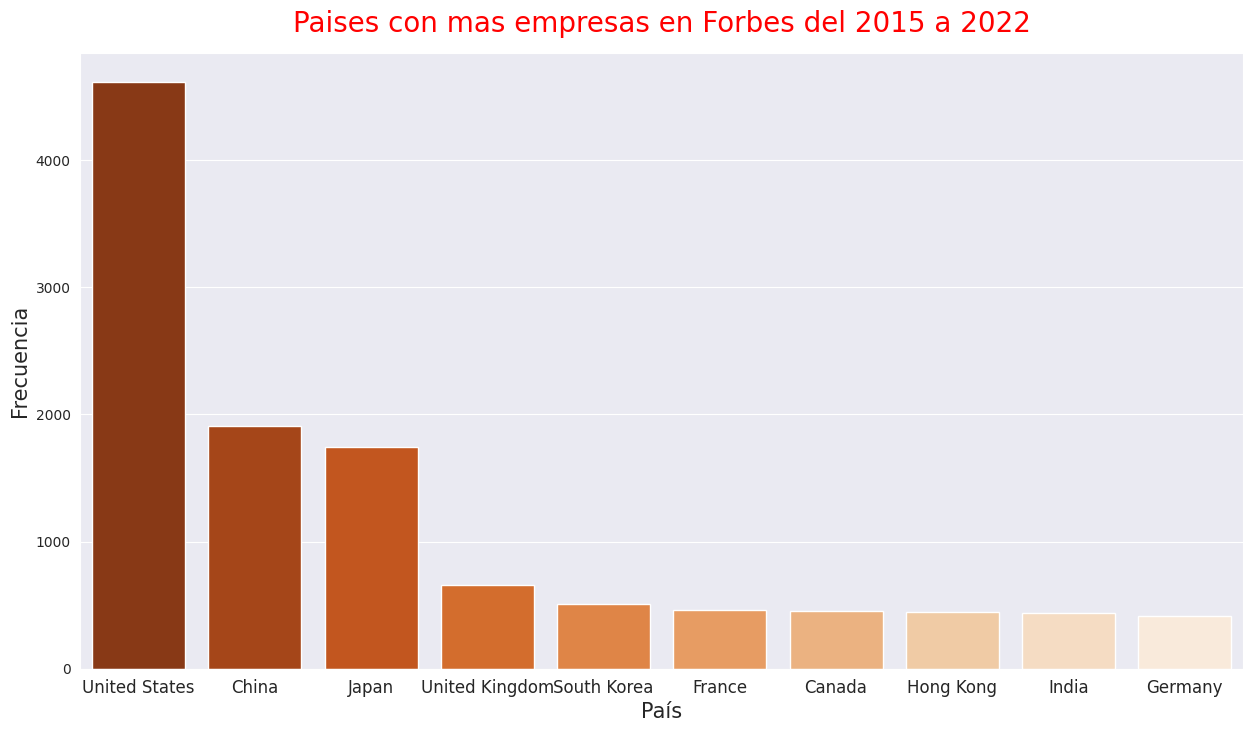

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

top10 = Forbes_concatenado['Pais'].value_counts().head(10)

plt.figure(figsize=(15, 8))
plt.title('Paises con mas empresas en Forbes del 2015 a 2022', fontsize = 20, color= 'Red', pad= 15)
plt.xlabel('País', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

sns.barplot(x=top10.index, y=top10.values, palette='Oranges_r')
plt.xticks(fontsize=12)
plt.show()


2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

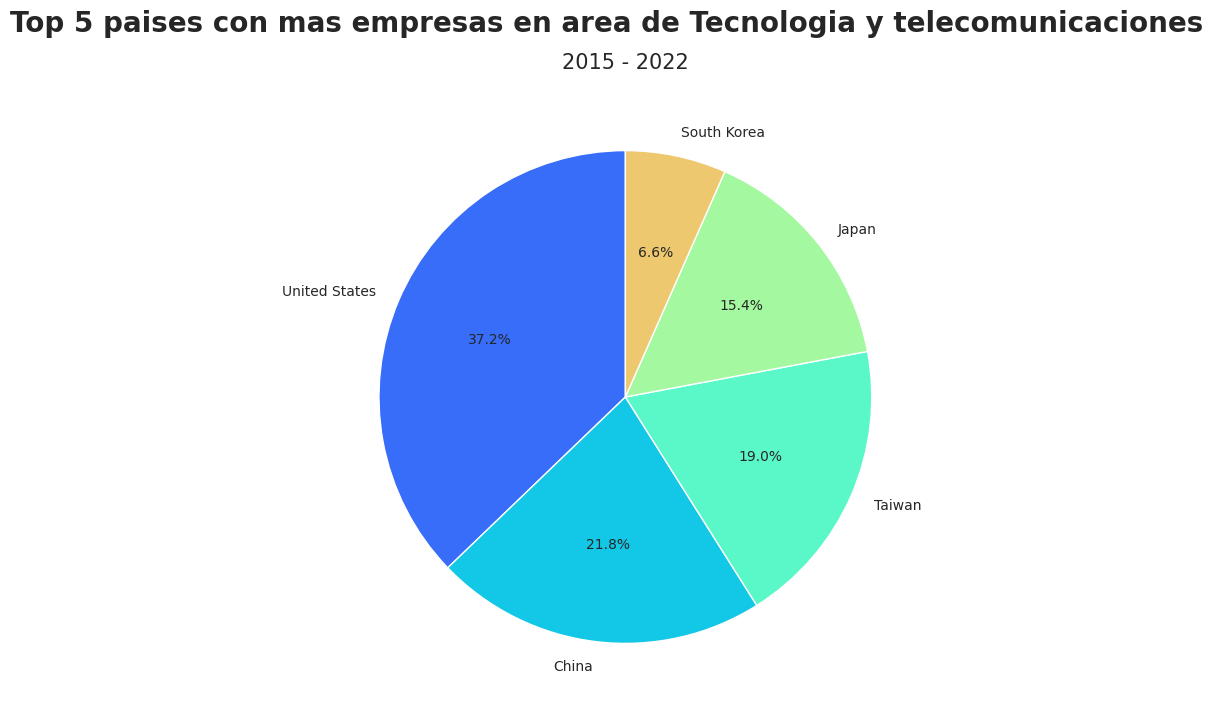

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

criterio  = Forbes_concatenado['Industria'].isin(['Technology Hardware & Equipment', 'Telecommunications Services'])
top4 = Forbes_concatenado.loc[criterio, 'Pais'].value_counts().head(5)


plt.figure(figsize=(15, 8))
plt.pie( top4.values, labels=top4.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('rainbow'))
plt.suptitle('Top 5 paises con mas empresas en area de Tecnologia y telecomunicaciones',fontsize=20,weight='bold')
plt.title('2015 - 2022',fontsize=15,pad=15)
plt.show()


3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

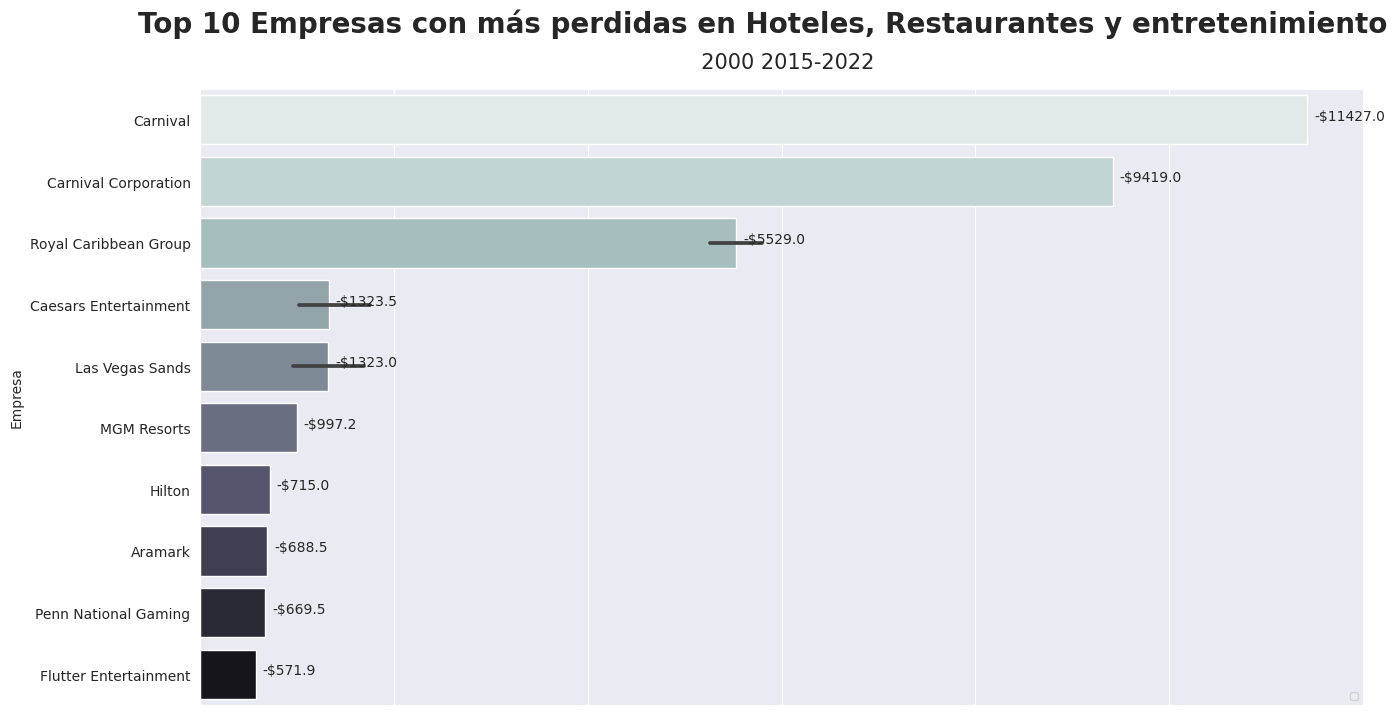

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

criterio  = Forbes_concatenado.query("Industria=='Hotels, Restaurants & Leisure' and Ganancias < 0 ").sort_values('Ganancias')
criterio['Perdida'] = abs (criterio['Ganancias'])
criterio = criterio.head(14)


# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=criterio, x='Perdida', y='Empresa', dodge=False,palette='bone_r')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Top 10 Empresas con más perdidas en Hoteles, Restaurantes y entretenimiento',fontsize=20,weight='bold')
plt.title('  2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'-${value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

In [ ]:
#agregando las columnas de la ubicacion al dataframe
Forbes_concatenado = Forbes_concatenado.merge(pais_continente[['Pais', 'Codigo_pais', 'Codigo_continente']], left_on='Pais', right_on='Pais', how='left')
Forbes_concatenado.sample(20)

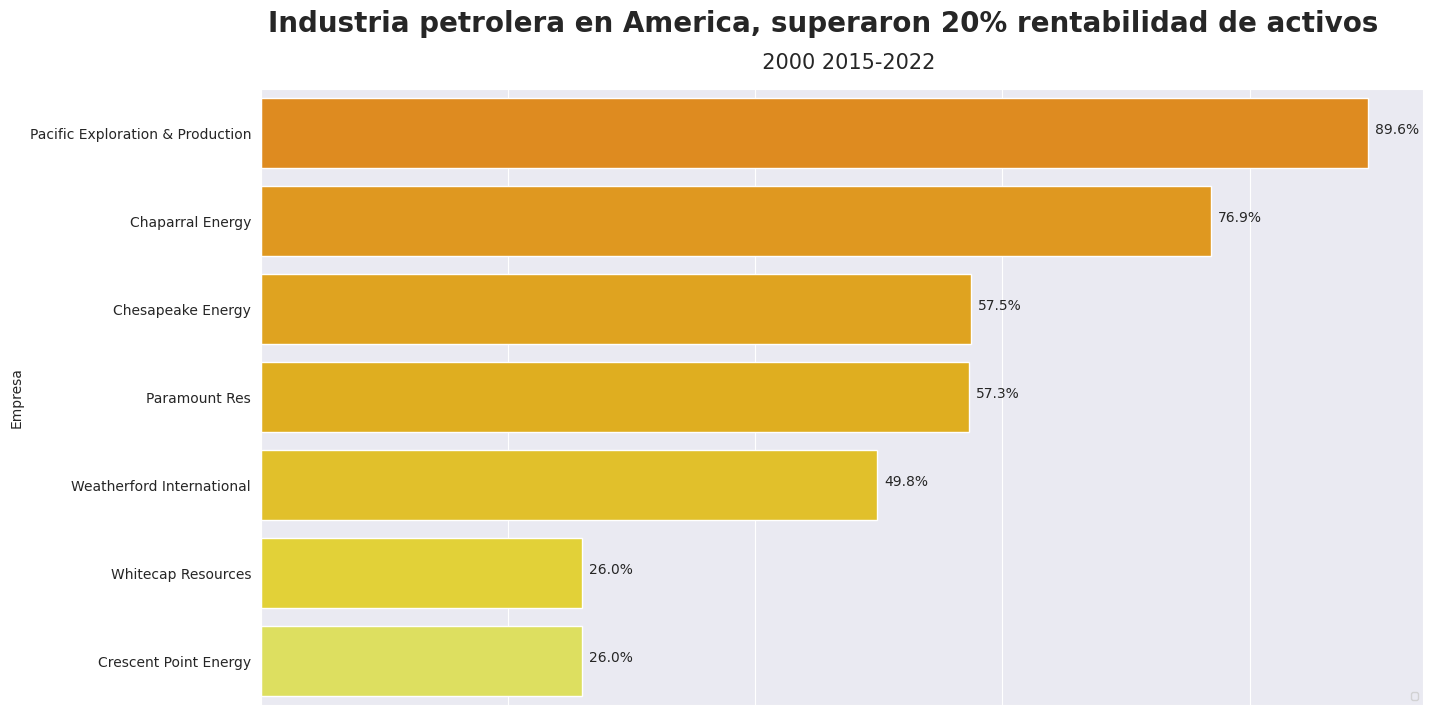

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
df_oil = Forbes_concatenado[(Forbes_concatenado['Industria'] == 'Oil & Gas Operations') &(Forbes_concatenado['Renta_activos'] > 0.2) & (Forbes_concatenado['Renta_activos'] < 1 ) &
                             ((Forbes_concatenado['Codigo_continente']=='NA')|(Forbes_concatenado['Codigo_continente']=='SA'))].sort_values('Renta_activos', ascending= False)
df_oil['RActivos%'] = df_oil['Renta_activos']*100
df_oil.head()

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df_oil, x='RActivos%', y='Empresa', dodge=False,palette='Wistia_r')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Industria petrolera en America, superaron 20% rentabilidad de activos',fontsize=20,weight='bold')
plt.title('  2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()





5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?


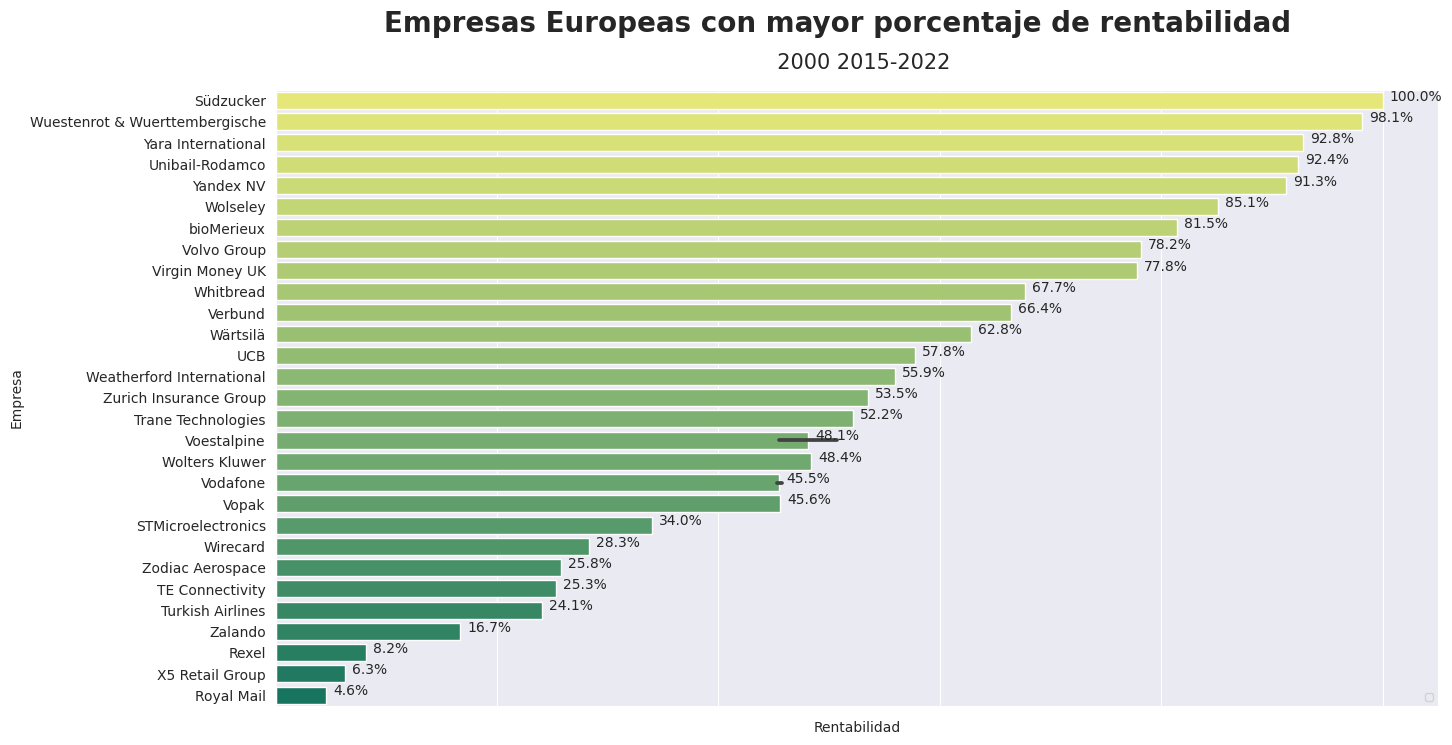

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
df_europa= Forbes_concatenado[(Forbes_concatenado['Codigo_continente']=='EU') & (Forbes_concatenado['Margen_renta']<1)]
df_Europa_Renta = df_europa.groupby('Industria').max().sort_values('Margen_renta', ascending = False)
df_Europa_Renta['Margen_renta']= df_Europa_Renta['Margen_renta']*100

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df_Europa_Renta, x='Margen_renta', y='Empresa', dodge=False,palette='summer_r')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas Europeas con mayor porcentaje de rentabilidad',fontsize=20,weight='bold')
plt.title('  2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('Rentabilidad')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'{value:.1f}%', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


6. ¿Cuáles fueron las 10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global?

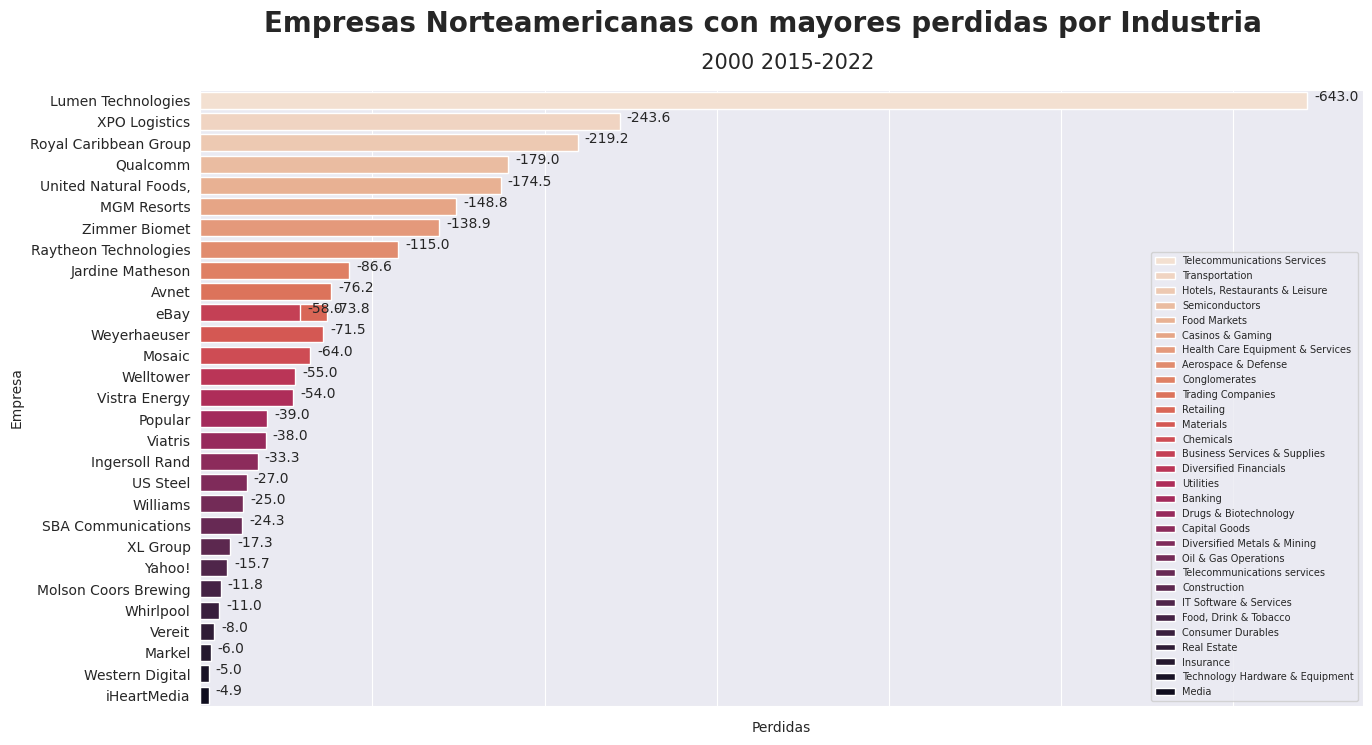

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
df_norteamerica= Forbes_concatenado [(Forbes_concatenado['Codigo_continente']=='NA') &
                                     (Forbes_concatenado['Ganancias'] < 0)]
df_Norteamerica_perdidas = df_norteamerica.groupby('Industria').max().sort_values('Ganancias')
df_Norteamerica_perdidas['perdidas']= abs(df_Norteamerica_perdidas['Ganancias'])

# Crear el gráfico utilizando Seaborn
plt.figure(figsize=(15, 8))
ax=sns.barplot(data=df_Norteamerica_perdidas, x='perdidas', y='Empresa', hue = df_Norteamerica_perdidas.index, dodge=False,palette='rocket_r')
ax.set_xticklabels([])
# Personalizar el gráfico
plt.suptitle('Empresas Norteamericanas con mayores perdidas por Industria',fontsize=20,weight='bold')
plt.title('  2000 2015-2022',fontsize=15,pad=15)
plt.xlabel('Perdidas')
plt.ylabel('Empresa')

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=7,loc='lower right')

for p in ax.patches:
    width = p.get_width()
    value = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height()/2
    ax.annotate(f'-{value:.1f}', (x, y), xytext=(5, 0), textcoords='offset points')

plt.show()


7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

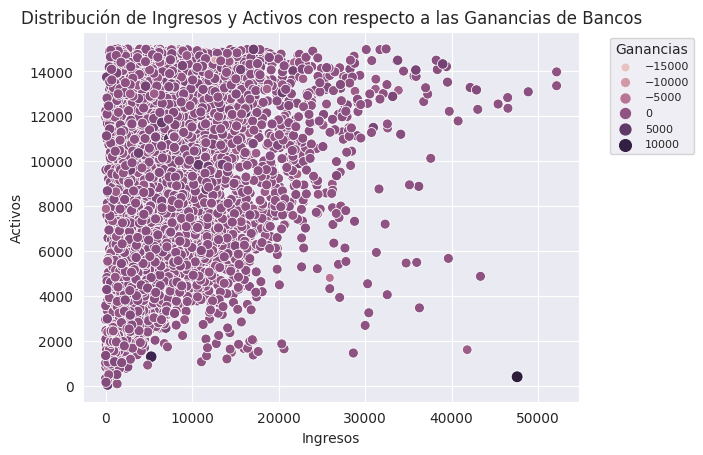

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
df_bancos = Forbes_concatenado [(Forbes_concatenado['Activos']  < 15000)]

# Crear la gráfica de dispersión utilizando Seaborn
sns.scatterplot(data=df_bancos, x='Ingresos', y='Activos', hue='Ganancias', size='Ganancias')

# Agregar leyendas y títulos
plt.legend(title='Ganancias', title_fontsize=10, fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Ingresos')
plt.ylabel('Activos')
plt.title('Distribución de Ingresos y Activos con respecto a las Ganancias de Bancos')

# Mostrar la gráfica
plt.show()


8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

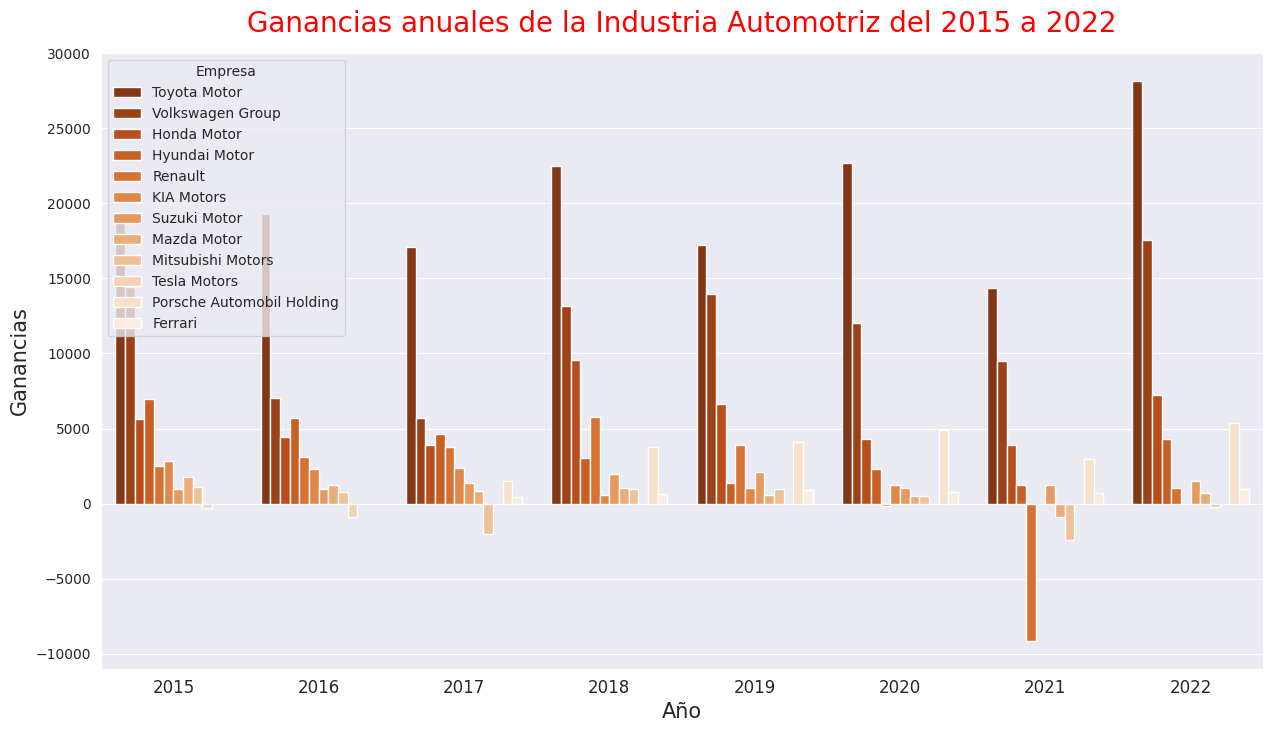

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

criterio_empresas=['Honda Motor','Hyundai Motor','KIA Motors','Mazda Motor','Mitsubishi Motors',
                    'Porsche Automobil Holding', 'Suzuki Motor','Toyota Motor','Volkswagen Group',
                    'Tesla Motors','Ferrari','Renault']
df_autos = Forbes_concatenado [(Forbes_concatenado['Empresa'].isin(criterio_empresas))]
df_autos

plt.figure(figsize=(15, 8))
plt.title('Ganancias anuales de la Industria Automotriz del 2015 a 2022', fontsize = 20, color= 'Red', pad= 15)
plt.xlabel('País', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

sns.barplot(x=df_autos['Año'], y=df_autos['Ganancias'], hue=df_autos['Empresa'],  palette='Oranges_r')
plt.xticks(fontsize=12)
plt.show()


